# Introduction
This project analyzes a wine dataset which are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The
analysis determined the quantities of 13 chemical attributes found in each of the three types of wines.

I will aim to use this data to take on the role of a data scientist, carrying out the full “data science” pipeline for the dataset. I will explore a question of interest on
the dataset, before providing an implementation which both explores and models the data.

## Problem
This dataset has lots of features, many of which may be disregarded when considering which cultivar a bottle of wine came from. I will set out to determine which of these features are not needed when using a model to predict where a bottle has come from and how accurately the model can correctly predict where a bottle is from with a reduced dataset.

## Proposed solution
I will explore the data:
* Which features correlate the highest to each other and also the cultivar.
* Are some features more telling in where a bottle of wine is from.
* Determine if this data can be used to model accurately.
* To see if a cultivar has an explicit difference in a certain feature (Cultivar X has a much higher average alcohol content than Y & Z).

I will use a variety of models:
* To determine which is the most accurate.
* To see if the prediction score remains accurate with a reduced dataset.

# Data Description and Exploratory Analysis
This dataset consists of 178 Italian wine samples, all from the same region in Italy, but from 3 different cultivars. Each sample has 14 features, the first column identifies which cultivar the wine is from whilst the other 13 are chemical attributes that are all range of continuous floats and integers.

This data does not require any pre-processing alteration as it doesn't contain any null values.

## Imports and reading data

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Model evaluation
import sklearn as sk

# Import train_test_split
from sklearn.model_selection import train_test_split

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the columns to the correct values as per https://archive.ics.uci.edu/ml/datasets/Wine
columns=['Cultivar','Alcohol','Malic acid','Ash','Alkalinity of ash','Magnesium',
         'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Colour intensity',
         'Hue','OD280/OD315 of diluted wines','Proline']

# Create 'wine_df' as our dataframe with column values
wine_df=pd.read_csv('wine.csv',names=columns)

# Display dataframe
rows, cols = wine_df.shape
print("wine_df has", rows, "records and", cols, "variables.\n")
wine_df

wine_df has 178 records and 14 variables.



Cultivar  Alcohol  Malic acid   Ash  Alkalinity of ash  Magnesium  \
0           1    14.23        1.71  2.43               15.6        127   
1           1    13.20        1.78  2.14               11.2        100   
2           1    13.16        2.36  2.67               18.6        101   
3           1    14.37        1.95  2.50               16.8        113   
4           1    13.24        2.59  2.87               21.0        118   
..        ...      ...         ...   ...                ...        ...   
173         3    13.71        5.65  2.45               20.5         95   
174         3    13.40        3.91  2.48               23.0        102   
175         3    13.27        4.28  2.26               20.0        120   
176         3    13.17        2.59  2.37               20.0        120   
177         3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Colour intensity   Hue  OD280/OD315 of diluted wines  Proline  
0                5.64  1.04                          3.92     1065  
1                4.38  1.05                          3.40     1050  
2                5.68  1.03                          3.17     1185  
3                7.80  0.86                          3.45     1480  
4                4.32  1.04                          2.93      735  
..                ...   ...                           ...      ...  
173              7.70  0.64                          1.74      740  
174              7.30  0.70                          1.56      750  
175             10.20  0.59                          1.56      835  
176              9.30  0.60                          1.62      840  
177              9.20  0.61                          1.60      560  

[178 rows x 14 columns]

## Splitting features and labels

The first column, `Cultivar`, denotes a label for the samples (stating which cultivar it is from). I will split this from the features in order to use the feature column later on.

* `label_frame`: Contains only the `Cultivar` column
* `feature_frame`: Contains all columns, except `Target`

In [3]:
# Drops all but the first column
label_frame = wine_df.iloc[:,[0]]

# Drops the 'Target' column
feature_frame = wine_df.drop(['Cultivar'],axis=1)

## Variable distribution
It is crucial to know if the dataset contains balanced and sufficient samples of each cultivar. If one cultivar has fewer samples, then it would be difficult to use models to accurately predict where a bottle of wine was from.

In [4]:
# Display split of cultivars
label_frame.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Cultivar
2           39.9%
1           33.1%
3           27.0%
dtype: object

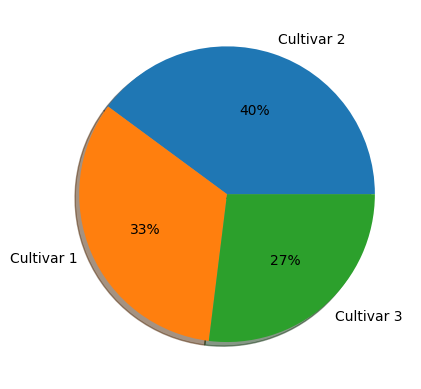

In [5]:
# Pie chart
labels='Cultivar 2','Cultivar 1','Cultivar 3'
fig, cc = plt.subplots()
cc.pie(label_frame.value_counts(),labels=labels,autopct='%.0f%%',shadow=True)
plt.show()

## Comparing cultivars
As this data has a similar count in each `Cultivar` we can compare the means of each feature to see which ones may be the most telling in which features are most distinguishable in determining where a bottle of wine is form.

In [6]:
# Rounded to ease viewing and clearly see if integers are close or not.
wine_df.groupby(['Cultivar']).mean().round(decimals=2)

Alcohol  Malic acid   Ash  Alkalinity of ash  Magnesium  \
Cultivar                                                            
1           13.74        2.01  2.46              17.04     106.34   
2           12.28        1.93  2.24              20.24      94.55   
3           13.15        3.33  2.44              21.42      99.31   

          Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
Cultivar                                                                     
1                  2.84        2.98                  0.29             1.90   
2                  2.26        2.08                  0.36             1.63   
3                  1.68        0.78                  0.45             1.15   

          Colour intensity   Hue  OD280/OD315 of diluted wines  Proline  
Cultivar                                                                 
1                     5.53  1.06                          3.16  1115.71  
2                     3.09  1.06                          2.79   519.51  
3                     7.40  0.68                          1.68   629.90

### Predictions
This table dispalys some early signs of answering one of the questions posed about if certain cultivars have key features which are much different to all the rest.
* `Cultivar 1`: Has the highest mean `Alcohol` content but not by a lot (+0.59), however working along it is clearer when looking at mean `Magenisum` (+7.03), `Flavanoids` (+0.9) and `OD280/OD315 of diluted wines` (+0.37), with the clearest difference being `Proline` (+485.81).
* `Cultivar 2`: Does not have many distinct features but does have the lowest mean level of `Magnesium` (-4.76), `Colour intensity` (-2,44) and `Proline` (-110.39).
* `Cultivar 3`: Has much more distinct features than the other two, potentially making it the easiest to predict when modelling. It has several much higher and lower mean levels accross the features. `Malic acid` (+1.32), `Total phenols` (-0.58), `Flavanoids` (-2.3), `Proanthocyanins` (-0.48), `Colour intensity` (+2.87) and `Hue` (-0.38).

I predict that `Alcohol`, `Total phenols`, `Flavanoids`, `Colour intensity` and `Proline` will give us clear clusters due to the means of these features being clear per cultivar.

I also predict `Ash`, `Alkalinity of ash` and `Magnesium` will not provide clear clustering as all the cultivars have very similar levels of these features. This information may be better used for determining whichr egion of Italy a bottle of wine has come from or which country it has come from.

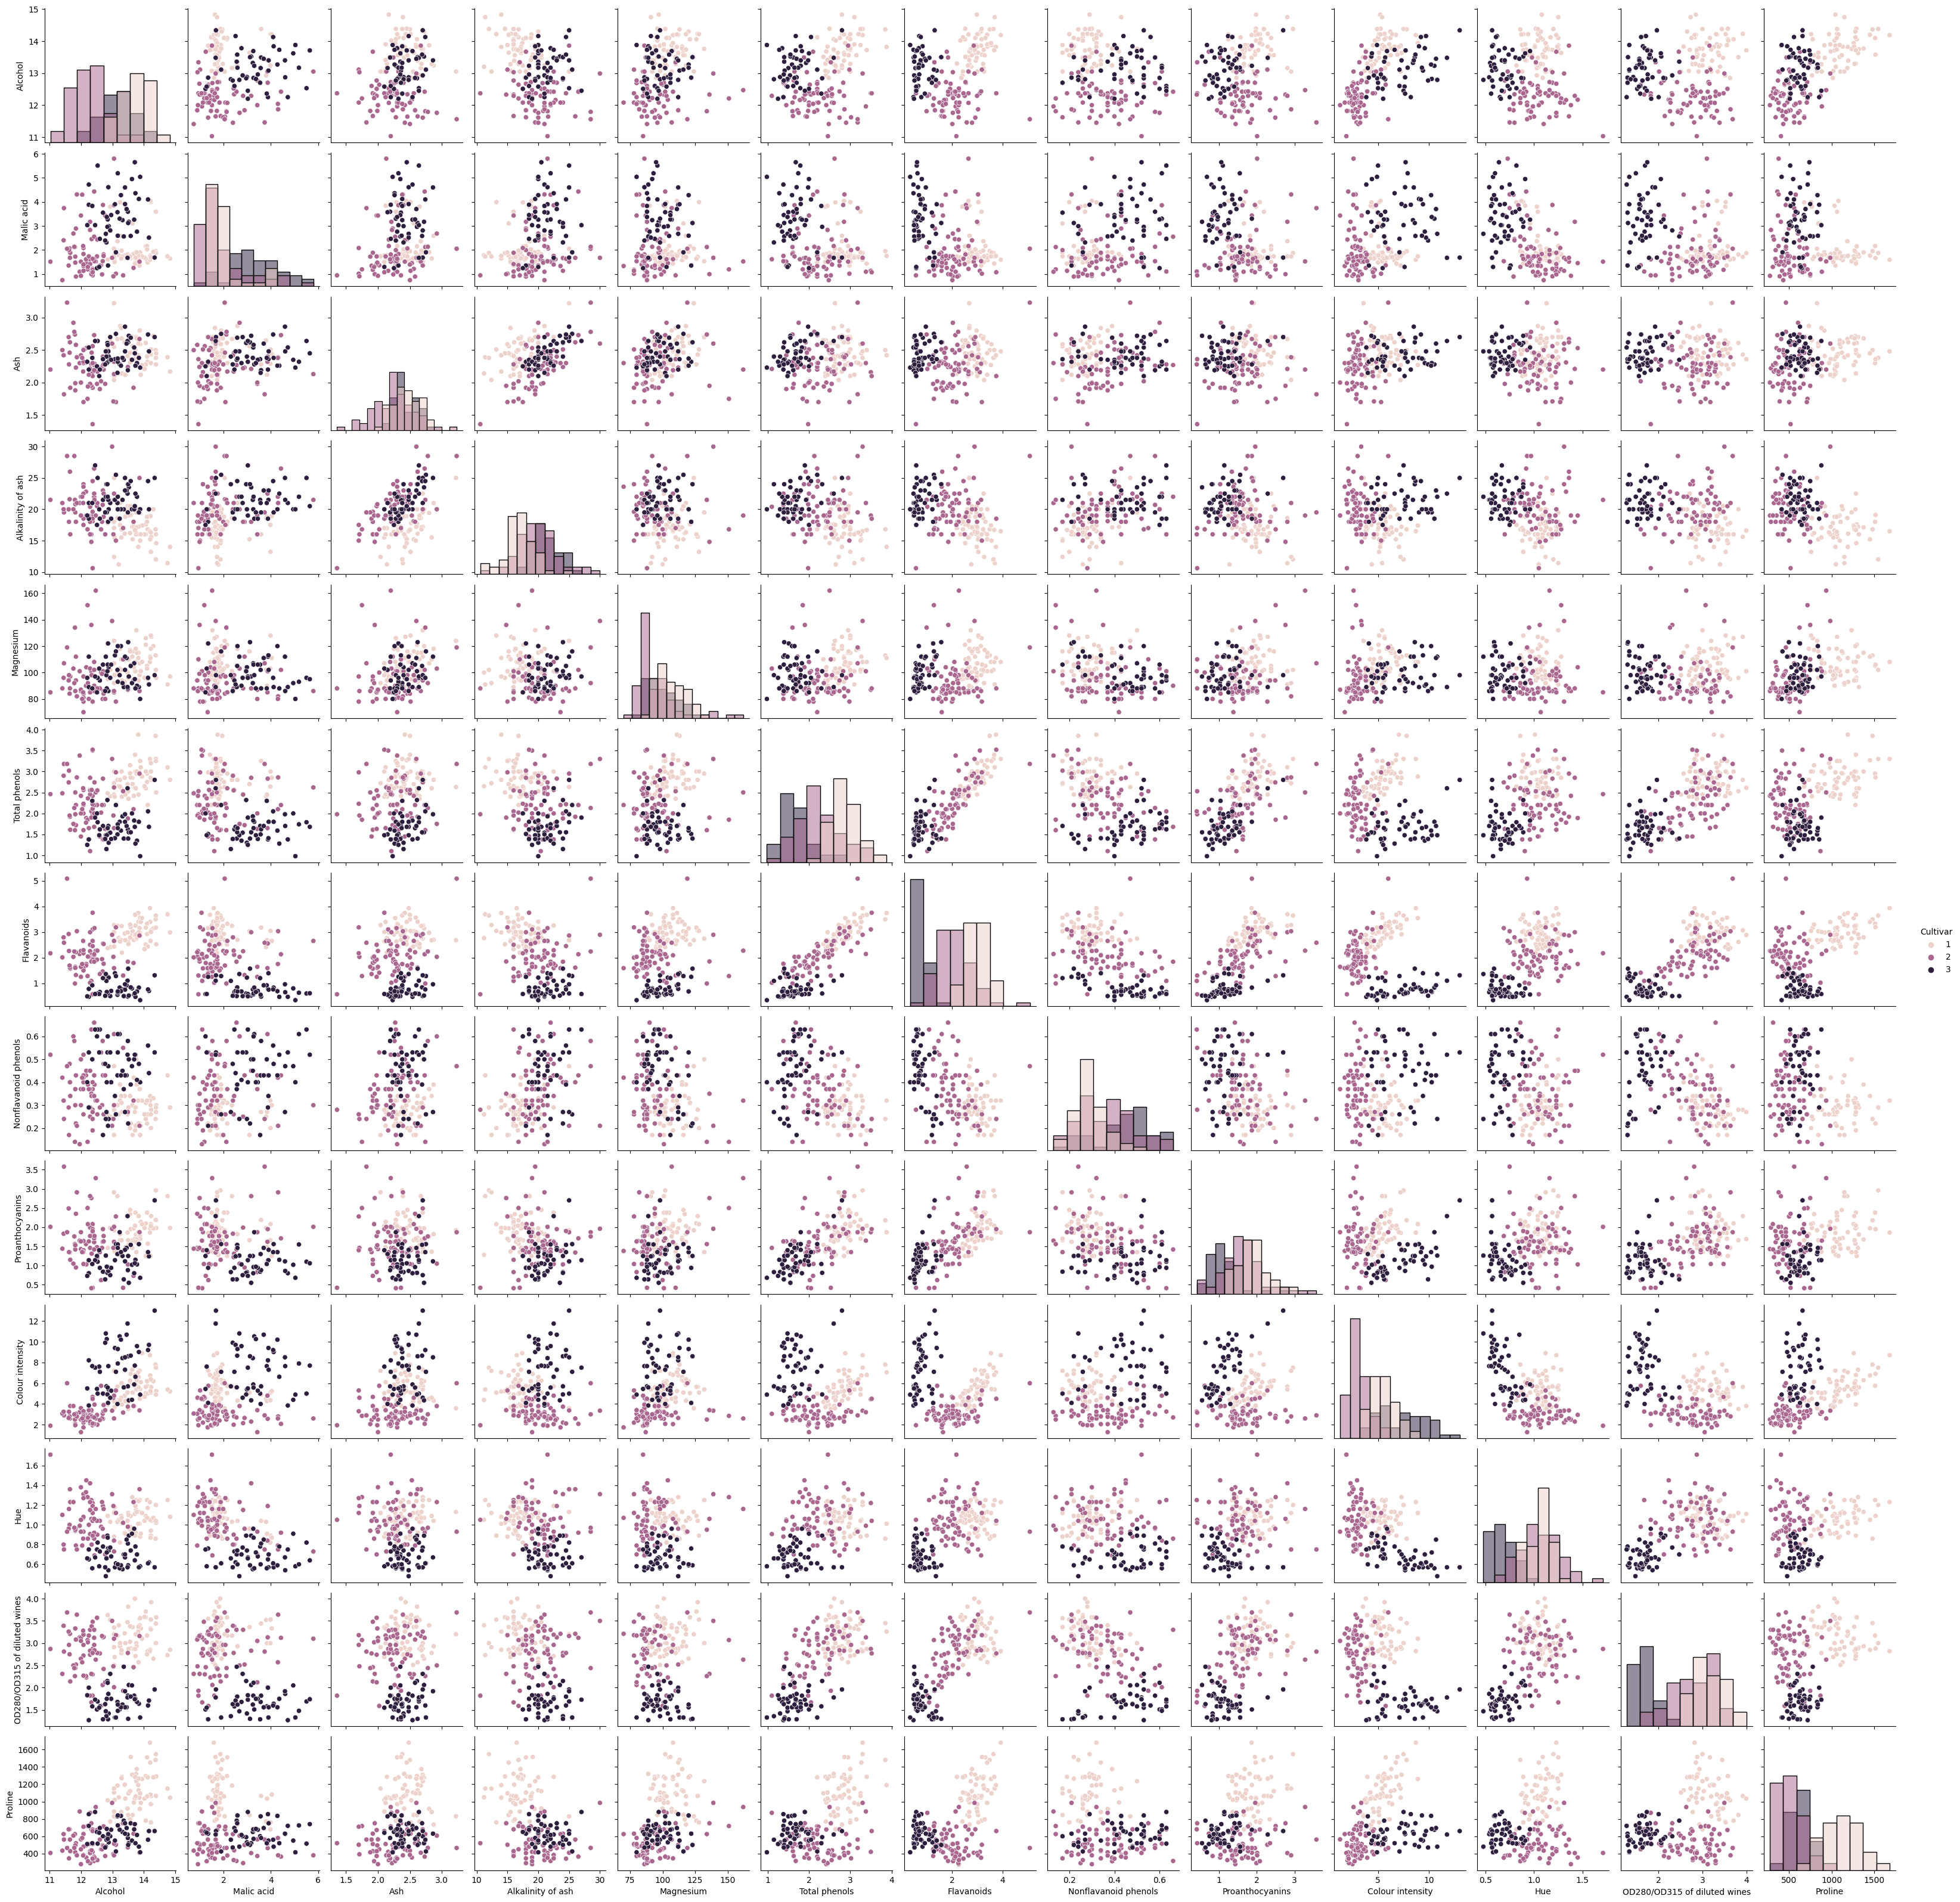

In [7]:
# View distribution much easier in a scatterplot matrix showing whcih variables show clearer clusters
sns.pairplot(wine_df,hue='Cultivar',diag_kind='hist')

### Prediction analysis
* `Alcohol`: Some clear clusters however the storngest disparity with `Total phenols`, `Flavanoids` and `Proline`.
* `Total phenols`: Majority of features lacked clear clusters however strong clusters with other predictions. `Alcohol`, `Flavanoids`, `Colour intensity` and `Proline`.
* `Flavanoids`: Strong clear clusters accross almost all features.
* `Colour intensity`: Clearest clusters with `Flavanoids`, `OO280...` and `Proline`.
* `Proline`: Very clear clusters with all variables specifically `OO280...`, `Colour intensity`, `Hue`, `Flavanoids` and `Alcohol`.

These features may be used solely during modelling as they can be used to determine where a bottle of wine came from more clearly than other features.

As predicted the weak features of `Ash`,`Alkalinity of ash` and `Magnesium` did not provide clear clusters and could potentially be removed befor modelling.

We can further confirm our predictions by comparing the corrleation between each variable those with a higher score display a higher correlation.

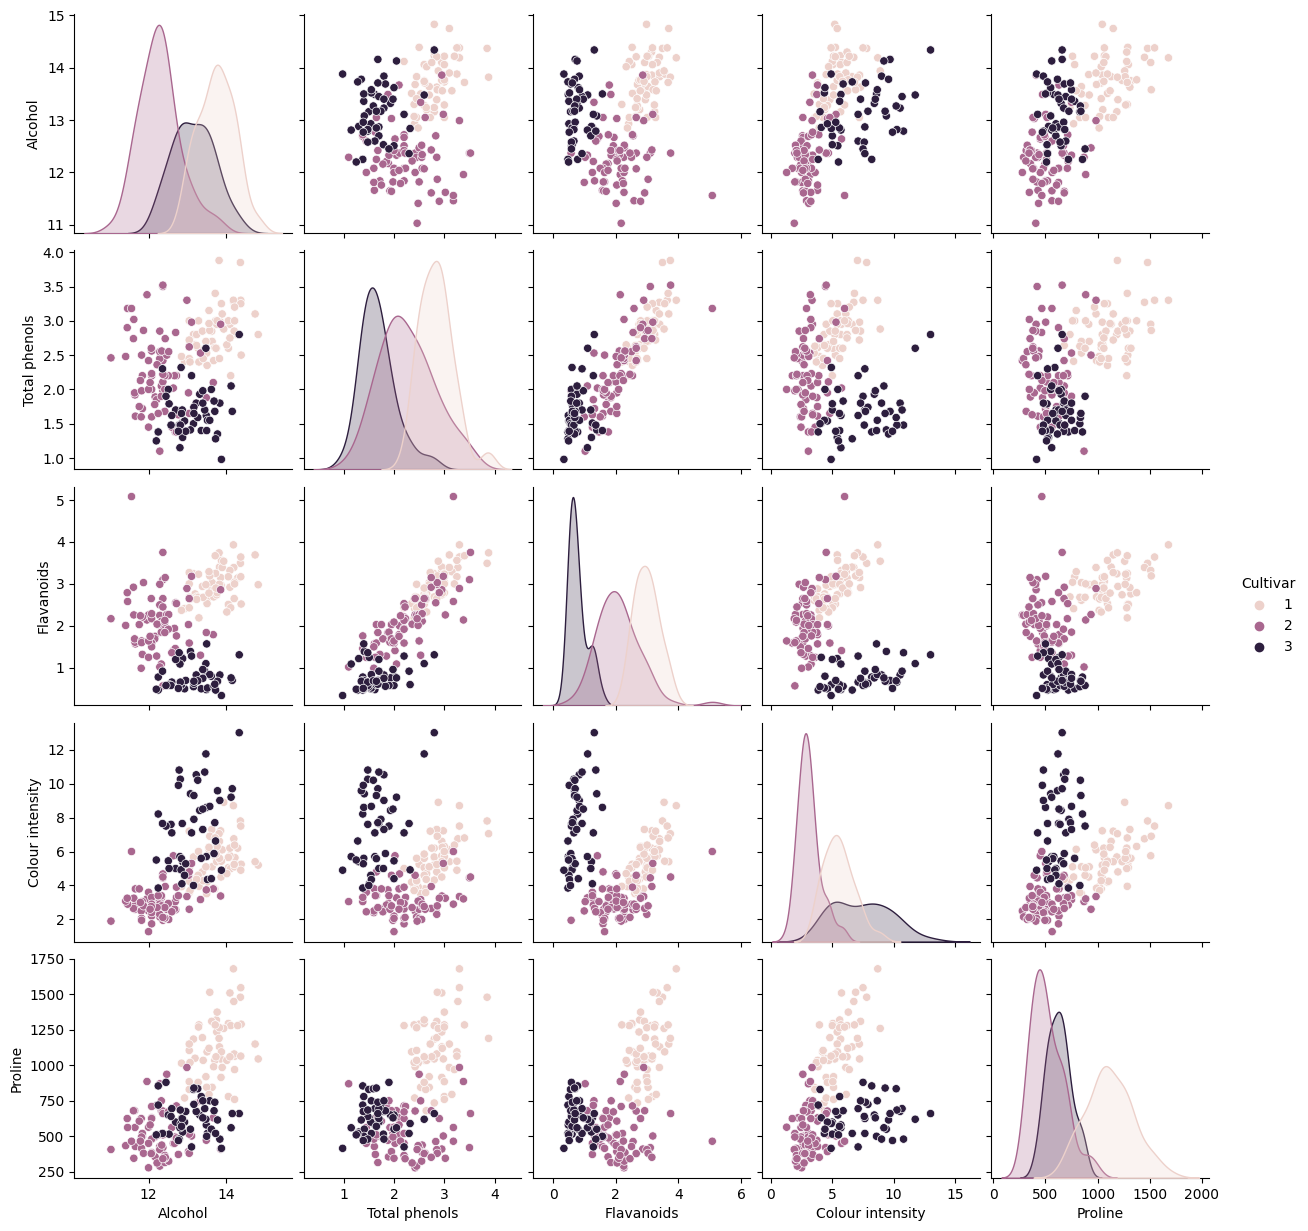

In [8]:
# Scatterplot matrix of our predictions
sns.pairplot(wine_df,
             vars=['Alcohol','Total phenols','Flavanoids','Colour intensity','Proline'],
             hue='Cultivar')

<AxesSubplot: >

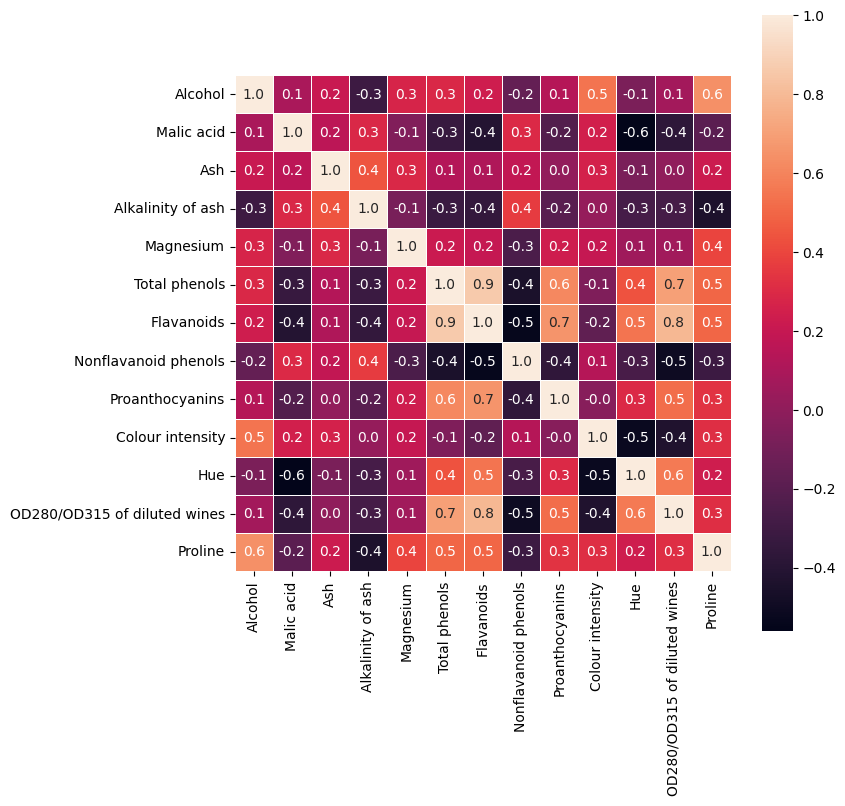

In [9]:
# Correlation heatmap of whole wine_df
# Cultivar removed as not needed
df_corr=feature_frame.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr,annot=True,linewidths=.5,square=True,fmt='.1f')

<AxesSubplot: >

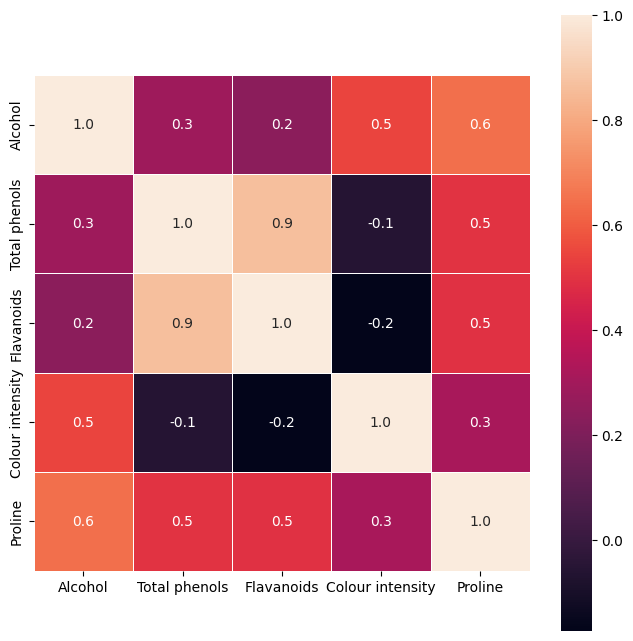

In [10]:
# Correlation heatmap of our predictions
pdf_corr=wine_df[['Alcohol','Total phenols','Flavanoids','Colour intensity','Proline']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(pdf_corr,annot=True,linewidths=.5,square=True,fmt='.1f')

### Heatmap analysis 
Our features that we predicted to have a strong correlation did have strong correlations with each other making them an even better choice for modelling. However some other features have dispalyed high correlation scores such as `Proanthocyanins` and `OD280/OD315 of diluted wines`. These may also be consdired when modelling.

# Build the Model
As discussed before we will initially find out which model is the most accurate for this set of data using all the features.

Then we will further split the `feature_frame` into the features we believe to be the most telling and least telling features in determining the `Cultivar`. Then remodel using the most accurate model, and compare the accuracy score to prove this. I will compare Linear regression; Decision tree classifier; Random forest and K-Nearest neighbour.

I will also remove the `weakest_frame` from `feature_frame` to see if removing these features gives us a stronger accuracy score.

## Scaling the data
Linear regression requires scaled data to predict.

In [11]:
# Linear regression requires scaling
scl_feature_frame=((feature_frame-feature_frame.mean())/(feature_frame.std()))

## Splitting the data into train and test
I will use the `train_test_split()` function, in order to split the data into a 50-50 split, with 50% being used for the training and 50% for the testing. This will hpoefully allow us enough testing data to see which model is the most accurate.
* `x`: Will be used for the feature columns.
* `y`: Will be used for the `Cultivar` column.

In [12]:
# Split
sclx_train, sclx_test, scly_train, scly_test = train_test_split(scl_feature_frame,label_frame,train_size=0.5)

## Model Comparison

### Linear regression

In [13]:
# Fit data to decision logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(sclx_train, np.ravel(scly_train))

LogisticRegression()

In [14]:
# Create predictions for logistic regression
reg_pred = reg.predict(sclx_test)

#### Model evaluation
I will use the `confusion_matrix` to visualise where each model corretly and incorrectly predicted cultivars:
* Along the y-axis is the correct cultivar.
* Along the y axis is what the model predicted for that sample.
* eg. If the model predicts a sample to be from cultivar 3 when it is from cultivar 2 then there will be a count is added to that box.

We can use `accuracy_score` to see a percentage output of how many correctly guessed samples each model got correct and use this value to decide which one to use for further modelling.

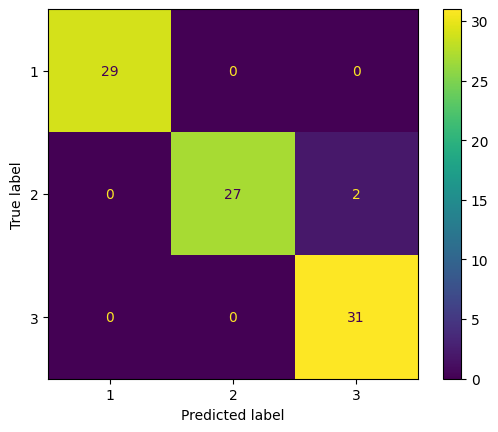

In [15]:
# Display confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(scly_test, reg_pred, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
print("Linear regression accuracy is: %.2f"%(accuracy_score(scly_test,reg_pred)*100))

Linear regression accuracy is: 97.75


### Decision tree

In [17]:
# Split
x_train, x_test, y_train, y_test = train_test_split(feature_frame,label_frame,train_size=0.5)

In [18]:
# Fit data to decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
# Create predictions for the decison tree
clf_pred=clf.predict(x_test)

#### Model evaluation

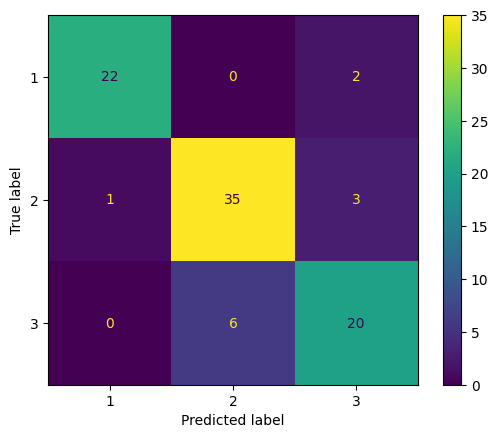

In [20]:
# Display confusion matrix for the decision tree
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [21]:
# Display accuracy score for decision tree
print("Decision tree accuracy is: %.2f"%(accuracy_score(y_test,clf_pred)*100))

Decision tree accuracy is: 86.52


### Random forest

In [22]:
# Fit data to random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [23]:
# Create random forest predictions
rfc_pred=rfc.predict(x_test)

#### Model evaluation

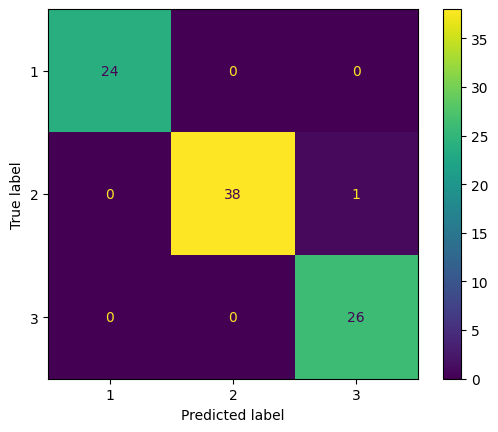

In [24]:
# Display confusion matrix for random forest
cm = confusion_matrix(y_test, rfc_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [25]:
# Display accuracy score for random forest
ras=(accuracy_score(y_test,rfc_pred)*100)
print("Random forest accuracy is: %.2f"%ras)

Random forest accuracy is: 98.88


### K-Nearest neighbour

In [26]:
# Fit data to k-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier()

In [27]:
# Creat predictions for k-nearest neighbour
knn_pred=rfc.predict(x_test)

#### Model evaluation

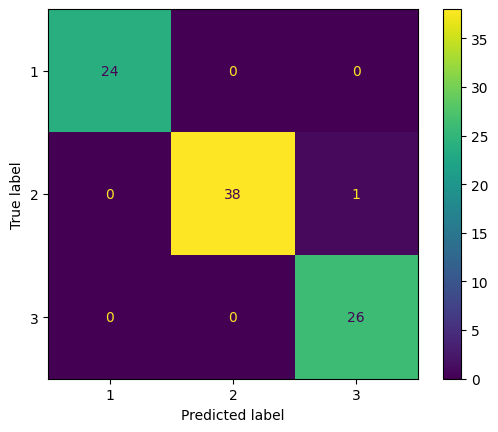

In [28]:
# Display confusion matrix for k-nearest neighbour
cm = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [29]:
# Display accuracy score for k-nearest neighbour
print("K-nearest neighbour accuracy is: %.2f"%(accuracy_score(y_test,knn_pred)*100))

K-nearest neighbour accuracy is: 98.88


## Model Discussion
I ran these models multiple times in order to see any trends between them. The decision tree model often scored lower than the other 3 sometimes significantly lower, making the results not very repeatable and therefore it will not be used in further modelling.

Linear regression, k-nearest neighbour and random forest all have very high accuracy scores and are all the same making it almost indifferent when picking one for the next task, in my kernel they all got two samples incorrect. K-nearest neighbour and random forest appear to have both made the same mistake; incorrectly predicting two cultivar 2 sample as a cultivar 1 sample and a cultivar 3 sample. Linear regression also made 2 mistakes but this isnt as easily comparable as it does not derive from the same `train_test_split`. 

These 3 models also often got 100% scores when predicting, so we can use either of them. However regression acheived this score on less occasions. I will choose random forest as it reproduced a 100% score more often than other models.

## Splitting into strongest and weakest features
* `strongest_frame` : `Alcohol`, `Total phenols`, `Flavanoids`, `Colour intensity` and `Proline`.
* `weakest_frame` : `Ash`,`Alkalinity of ash` and `Magnesium`.
* `test_frame` : `feature_frame` - `weakest_frame`.

In [30]:
# Strongest frame
strongest_frame=feature_frame[['Alcohol','Total phenols','Flavanoids','Colour intensity','Proline']]
# Weakest frame
weakest_frame=feature_frame[['Ash','Alkalinity of ash','Magnesium']]
# Test frame
test_frame=feature_frame.drop(['Ash','Alkalinity of ash','Magnesium'],axis=1)

## Splitting each frame

In [31]:
# Strongest frame
sx_train, sx_test, sy_train, sy_test = train_test_split(strongest_frame,label_frame,train_size=0.5)
# Weakest frame
wx_train, wx_test, wy_train, wy_test = train_test_split(weakest_frame,label_frame,train_size=0.5)
# Test frame
tx_train, tx_test, ty_train, ty_test = train_test_split(test_frame,label_frame,train_size=0.5)

## Strongest frame

In [32]:
# Fit data to random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(sx_train, sy_train.values.ravel())

RandomForestClassifier()

In [33]:
# Create random forest predictions
srfc_pred=rfc.predict(sx_test)

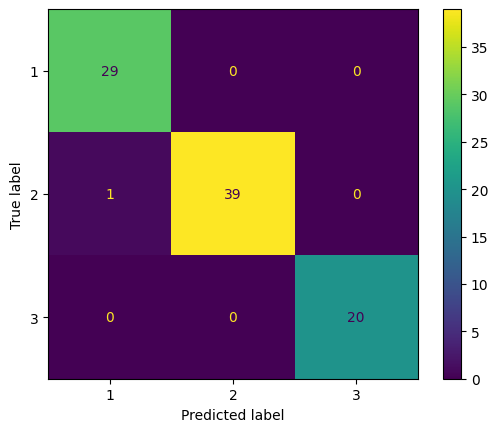

In [34]:
# Display confusion matrix for random forest
cm = confusion_matrix(sy_test, srfc_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [35]:
# Display accuracy score for random forest
sas=(accuracy_score(sy_test,srfc_pred)*100)
print("Random forest accuracy for the strongest frame is: %.2f"%sas)

Random forest accuracy for the strongest frame is: 98.88


## Weakest frame

In [36]:
# Fit data to random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(wx_train, wy_train.values.ravel())

RandomForestClassifier()

In [37]:
# Create random forest predictions
wrfc_pred=rfc.predict(wx_test)

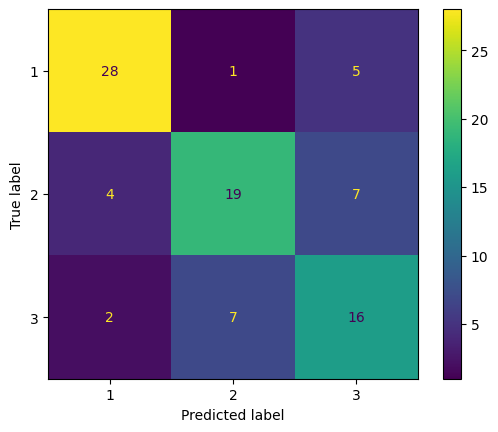

In [38]:
# Display confusion matrix for random forest
cm = confusion_matrix(wy_test, wrfc_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [39]:
# Display accuracy score for random forest
was=(accuracy_score(wy_test,wrfc_pred)*100)
print("Random forest accuracy for the weakest frame is: %.2f"%was)

Random forest accuracy for the weakest frame is: 70.79


## Test frame

In [40]:
# Fit data to random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(tx_train, ty_train.values.ravel())

RandomForestClassifier()

In [41]:
# Create random forest predictions
trfc_pred=rfc.predict(tx_test)

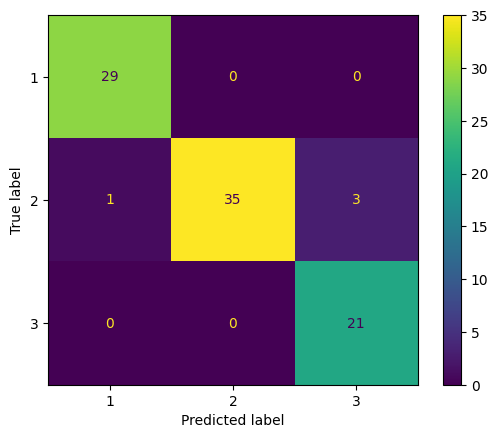

In [42]:
# Display confusion matrix for random forest
cm = confusion_matrix(ty_test, trfc_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()
plt.show()

In [43]:
# Display accuracy score for random forest
tas=accuracy_score(ty_test,trfc_pred)*100
print("Random forest accuracy for the test frame is: %.2f"%tas)

Random forest accuracy for the test frame is: 95.51


# Discussion of Results

In [44]:
# Put scores into a dataframe
d={'Normal':[ras],'Strongest':[sas],'Weakest':[was],'Test':[tas]}
df=pd.DataFrame(data=d)
df

Normal  Strongest    Weakest       Test
0  98.876404  98.876404  70.786517  95.505618

# Conclusion
As we can see the random forest model, where no changes were applied produced the highest score, as it has the most features to aid prediction. Unfortunately, my prediction that the `strongest_frame` would score higher or equal the original model is incorrect, however it still produced a high accuracy score. Interestingly the same score as the `test_frame`, which was not expected, it has expected to be higher as it includes not only the `strongest_frame` but other features and also removes the weakest ones. The `test_frame` was expected to have a high accuracy score due to the removal of the weaker features.

We correctly predicted that the `weakest_frame` would have a lower accuracy score as it only contains poorly correlating features which also did not display clear clusters. Therefore it would be much harder to predict as the model can not distinguisg clearly between cultivars.

In conclusion, our data scored very highly on all models, showing that it is a good data set to use alone, and does not require us to remove the features that I removed. However, there may be other features that are worth removing that would consistently provide a higher accuracy score (95%+), than the ones we chose. The strongest frame may also be improved with the addition of other features such as `Proanthocyanins` and `OD280/OD315 of diluted wines`, however we displayed that a high accuracy score can still be represented with a largely reduced dataset.

# References
* https://archive.ics.uci.edu/ml/datasets/Wine
* https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501